In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
df = pd.read_table('WEOOct2020all.tsv')

In [202]:
df.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2018,2019,2020,2021,2022,2023,2024,2025,Estimates Start After,Unnamed: 56
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,270.216","1,319.902","1,253.906","1,304.063","1,363.060","1,424.397","1,481.497","1,540.937",2019.0,NaN
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,1.189,3.912,-5.000,4.000,4.524,4.500,4.009,4.012,2019.0,NaN
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,327.690","1,469.596","1,465.922","1,597.738","1,741.832","1,893.023","2,047.665","2,215.013",2019.0,NaN
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,18.401,18.876,19.006,19.692,20.829,22.022,23.169,24.372,2019.0,NaN
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,77.416,81.880,78.884,83.852,89.205,94.908,100.600,106.685,2019.0,NaN


In [308]:
df.columns

Index(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country',
       'Subject Descriptor', 'Subject Notes', 'Units', 'Scale',
       'Country/Series-specific Notes', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024', '2025', 'Estimates Start After',
       'Unnamed: 56'],
      dtype='object')

In [309]:
df["Subject Descriptor"].unique()

array(['Gross domestic product, constant prices',
       'Gross domestic product, current prices',
       'Gross domestic product, deflator',
       'Gross domestic product per capita, constant prices',
       'Gross domestic product per capita, current prices',
       'Output gap in percent of potential GDP',
       'Gross domestic product based on purchasing-power-parity (PPP) share of world total',
       'Implied PPP conversion rate', 'Total investment',
       'Gross national savings', 'Inflation, average consumer prices',
       'Inflation, end of period consumer prices',
       'Six-month London interbank offered rate (LIBOR)',
       'Volume of imports of goods and services',
       'Volume of Imports of goods',
       'Volume of exports of goods and services',
       'Volume of exports of goods', 'Unemployment rate', 'Employment',
       'Population', 'General government revenue',
       'General government total expenditure',
       'General government net lending/borrowing',

In [171]:
feature_columns = ['Total investment',
       'Gross national savings', 'Inflation, average consumer prices',
       'Inflation, end of period consumer prices',
       'Six-month London interbank offered rate (LIBOR)',
       'Volume of imports of goods and services',
       'Volume of Imports of goods',
       'Volume of exports of goods and services',
       'Volume of exports of goods', 'Unemployment rate', 'Employment',
       'Population', 'General government revenue',
       'General government total expenditure',
       'General government net lending/borrowing',
       'General government structural balance',
       'General government primary net lending/borrowing',
       'General government net debt', 'General government gross debt',
       'Current account balance']

In [262]:
len(feature_columns)

20

In [172]:
df['Country'].value_counts()

Equatorial Guinea           45
Angola                      45
Spain                       45
Azerbaijan                  45
Samoa                       45
                            ..
Mongolia                    45
Ukraine                     45
Taiwan Province of China    45
Egypt                       45
Bosnia and Herzegovina      45
Name: Country, Length: 195, dtype: int64

In [173]:
mask = df['Subject Descriptor'].isin(feature_columns)

In [174]:
df = df[mask]

In [175]:
len(df["Subject Descriptor"].unique())

20

In [176]:
df['Country'].value_counts()

Equatorial Guinea           30
Angola                      30
Spain                       30
Azerbaijan                  30
Samoa                       30
                            ..
Mongolia                    30
Ukraine                     30
Taiwan Province of China    30
Egypt                       30
Bosnia and Herzegovina      30
Name: Country, Length: 195, dtype: int64

In [118]:
df['2019'].isnull().sum()

1049

In [177]:
mask = df['Units'].isin(['Percent of GDP'])
df = df[mask]

In [179]:
df.shape

(1755, 57)

In [359]:
rest_columns = [
       'Inflation, average consumer prices',
       'Inflation, end of period consumer prices',
       'Six-month London interbank offered rate (LIBOR)',
       'Volume of imports of goods and services',
       'Volume of Imports of goods',
       'Volume of exports of goods and services',
       'Volume of exports of goods', 'Unemployment rate', 'Employment',
       'Population', 'General government revenue',
       'General government total expenditure',
       'General government net lending/borrowing',
       'General government structural balance',
       'General government primary net lending/borrowing',
       'General government net debt', 'General government gross debt',
       'Current account balance', 'Gross domestic product, constant prices']

In [343]:
new_df = df[df['Subject Descriptor']=="Total investment"]
        

In [344]:
new_df = new_df[['Country', '2019']]

In [345]:
new_df.rename(columns={'2019': 'Total investment'}, inplace=True)

In [346]:
new_df.head()

,Country,Total investment
14,Afghanistan,18.192
59,Albania,22.752
104,Algeria,42.658
149,Angola,19.786
194,Antigua and Barbuda,33.239


In [295]:
for c in rest_columns:
    temp_df = df[(df['Subject Descriptor']==c)]
    print(f'Column: {c}')
    print(temp_df['Units'].unique())
    print('----------------------------')
    

Column: Gross national savings
['Percent of GDP']
----------------------------
Column: Inflation, average consumer prices
['Index' 'Percent change']
----------------------------
Column: Inflation, end of period consumer prices
['Index' 'Percent change']
----------------------------
Column: Six-month London interbank offered rate (LIBOR)
['Percent']
----------------------------
Column: Volume of imports of goods and services
['Percent change']
----------------------------
Column: Volume of Imports of goods
['Percent change']
----------------------------
Column: Volume of exports of goods and services
['Percent change']
----------------------------
Column: Volume of exports of goods
['Percent change']
----------------------------
Column: Unemployment rate
['Percent of total labor force']
----------------------------
Column: Employment
['Persons']
----------------------------
Column: Population
['Persons']
----------------------------
Column: General government revenue
['National currency

In [347]:
for c in rest_columns:
    temp_df = df[df['Subject Descriptor']== c]
    
    if len(temp_df['Units'].unique()) > 1:   
        for u in list(temp_df['Units'].unique()):
            print(f'Inner loop: {c}')
            mask = temp_df['Units'] == u
            temp_df = temp_df[mask]
            temp_df = temp_df[['Country', '2019']]
            temp_df.rename(columns={'2019': f'{c}'}, inplace=True)
            new_df = pd.merge(new_df, temp_df, on='Country', how='outer')
            break
    else:
        temp_df = temp_df[['Country', '2019']]
        print(f'columns: {c}')
        temp_df.rename(columns={'2019': f'{c}'}, inplace=True)
        new_df = pd.merge(new_df, temp_df, on='Country', how='outer')
#     print(new_df.columns)

Inner loop: Inflation, average consumer prices
Inner loop: Inflation, end of period consumer prices
columns: Six-month London interbank offered rate (LIBOR)
columns: Volume of imports of goods and services
columns: Volume of Imports of goods
columns: Volume of exports of goods and services
columns: Volume of exports of goods
columns: Unemployment rate
columns: Employment
columns: Population
Inner loop: General government revenue
Inner loop: General government total expenditure
Inner loop: General government net lending/borrowing
Inner loop: General government structural balance
Inner loop: General government primary net lending/borrowing
Inner loop: General government net debt
Inner loop: General government gross debt
Inner loop: Current account balance
Inner loop: Gross domestic product, constant prices


In [348]:
new_df.shape

(195, 21)

In [352]:
new_df[new_df['Country'] == 'Lithuania']

,Country,Total investment,"Inflation, average consumer prices","Inflation, end of period consumer prices",Six-month London interbank offered rate (LIBOR),Volume of imports of goods and services,Volume of Imports of goods,Volume of exports of goods and services,Volume of exports of goods,Unemployment rate,...,Population,General government revenue,General government total expenditure,General government net lending/borrowing,General government structural balance,General government primary net lending/borrowing,General government net debt,General government gross debt,Current account balance,"Gross domestic product, constant prices"
99,Lithuania,16.684,109.466,110.620,NaN,6.034,NaN,9.559,NaN,6.254,...,2.783,16.647,16.518,0.129,0.121,0.518,15.249,18.242,2.313,42.981


In [350]:
new_df.columns

Index(['Country', 'Total investment', 'Inflation, average consumer prices',
       'Inflation, end of period consumer prices',
       'Six-month London interbank offered rate (LIBOR)',
       'Volume of imports of goods and services', 'Volume of Imports of goods',
       'Volume of exports of goods and services', 'Volume of exports of goods',
       'Unemployment rate', 'Employment', 'Population',
       'General government revenue', 'General government total expenditure',
       'General government net lending/borrowing',
       'General government structural balance',
       'General government primary net lending/borrowing',
       'General government net debt', 'General government gross debt',
       'Current account balance', 'Gross domestic product, constant prices'],
      dtype='object')

In [355]:
new_df.to_csv('2019_GDP.csv', index=False)

In [365]:
df_2019 = pd.read_csv('2019_GDP.csv')

In [366]:
df_2019.head().T

,0,1,2,3,4
Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda
Total investment,18.192,22.752,42.658,19.786,33.239
"Inflation, average consumer prices",114.264,106.878,206.200,352.664,101.083
"Inflation, end of period consumer prices",116.300,107.103,207.900,381.299,101.640
Six-month London interbank offered rate (LIBOR),NaN,NaN,NaN,NaN,NaN
Volume of imports of goods and services,-7.862,4.721,-0.027,-11.289,-1.191
Volume of Imports of goods,-5.758,3.461,1.758,-7.894,-5.149
Volume of exports of goods and services,-5.116,1.699,-3.636,0.227,8.048
Volume of exports of goods,0.068,-8.454,-5.125,0.496,8.555
Unemployment rate,NaN,11.5,11.383,NaN,NaN


In [367]:
df_2019.isnull().sum()

Country                                               0
Total investment                                     24
Inflation, average consumer prices                    2
Inflation, end of period consumer prices              2
Six-month London interbank offered rate (LIBOR)     193
Volume of imports of goods and services              18
Volume of Imports of goods                           18
Volume of exports of goods and services              17
Volume of exports of goods                           18
Unemployment rate                                    89
Employment                                          157
Population                                            2
General government revenue                            1
General government total expenditure                  2
General government net lending/borrowing              2
General government structural balance               109
General government primary net lending/borrowing     10
General government net debt                     

In [371]:
df_2019.drop(['Six-month London interbank offered rate (LIBOR)', 'Employment',
              'General government structural balance', 
              'General government net debt', 'Country'], axis = 1, inplace=True)

In [372]:
df_2019.dtypes

Total investment                                    float64
Inflation, average consumer prices                   object
Inflation, end of period consumer prices             object
Volume of imports of goods and services             float64
Volume of Imports of goods                          float64
Volume of exports of goods and services             float64
Volume of exports of goods                          float64
Unemployment rate                                   float64
Population                                           object
General government revenue                           object
General government total expenditure                 object
General government net lending/borrowing             object
General government primary net lending/borrowing     object
General government gross debt                        object
Current account balance                             float64
Gross domestic product, constant prices              object
dtype: object

In [374]:
columns = df_2019.columns

In [378]:
columns = ['Inflation, average consumer prices',
       'Inflation, end of period consumer prices',
       'Population', 'General government revenue',
       'General government total expenditure',
       'General government net lending/borrowing',
       'General government primary net lending/borrowing',
       'General government gross debt',
       'Gross domestic product, constant prices']

In [380]:
for i in columns:
    df_2019[i] = df_2019[i].str.replace(',', '')
    df_2019[i] = pd.to_numeric(df_2019[i], errors='coerce')

In [381]:
df_2019.dtypes

Total investment                                    float64
Inflation, average consumer prices                  float64
Inflation, end of period consumer prices            float64
Volume of imports of goods and services             float64
Volume of Imports of goods                          float64
Volume of exports of goods and services             float64
Volume of exports of goods                          float64
Unemployment rate                                   float64
Population                                          float64
General government revenue                          float64
General government total expenditure                float64
General government net lending/borrowing            float64
General government primary net lending/borrowing    float64
General government gross debt                       float64
Current account balance                             float64
Gross domestic product, constant prices             float64
dtype: object

In [385]:
df_2019.isnull().sum()

Total investment                                    24
Inflation, average consumer prices                   2
Inflation, end of period consumer prices             2
Volume of imports of goods and services             18
Volume of Imports of goods                          18
Volume of exports of goods and services             17
Volume of exports of goods                          18
Unemployment rate                                   89
Population                                           2
General government revenue                           1
General government total expenditure                 2
General government net lending/borrowing             2
General government primary net lending/borrowing    10
General government gross debt                        5
Current account balance                              2
Gross domestic product, constant prices              2
dtype: int64

In [390]:
df_2019 = df_2019.apply(lambda x: x.fillna(x.mean()),axis=0)

In [391]:
df_2019.isnull().sum()

Total investment                                    0
Inflation, average consumer prices                  0
Inflation, end of period consumer prices            0
Volume of imports of goods and services             0
Volume of Imports of goods                          0
Volume of exports of goods and services             0
Volume of exports of goods                          0
Unemployment rate                                   0
Population                                          0
General government revenue                          0
General government total expenditure                0
General government net lending/borrowing            0
General government primary net lending/borrowing    0
General government gross debt                       0
Current account balance                             0
Gross domestic product, constant prices             0
dtype: int64

In [392]:
df_2019.head().T

,0,1,2,3,4
Total investment,18.192000,22.752,42.658,19.786000,33.239000
"Inflation, average consumer prices",114.264000,106.878,206.200,352.664000,101.083000
"Inflation, end of period consumer prices",116.300000,107.103,207.900,381.299000,101.640000
Volume of imports of goods and services,-7.862000,4.721,-0.027,-11.289000,-1.191000
Volume of Imports of goods,-5.758000,3.461,1.758,-7.894000,-5.149000
Volume of exports of goods and services,-5.116000,1.699,-3.636,0.227000,8.048000
Volume of exports of goods,0.068000,-8.454,-5.125,0.496000,8.555000
Unemployment rate,7.458689,11.500,11.383,7.458689,7.458689
Population,37.209000,2.870,43.424,30.128000,0.097000
General government revenue,395.923000,460.314,6586.500,6529.102000,0.849000


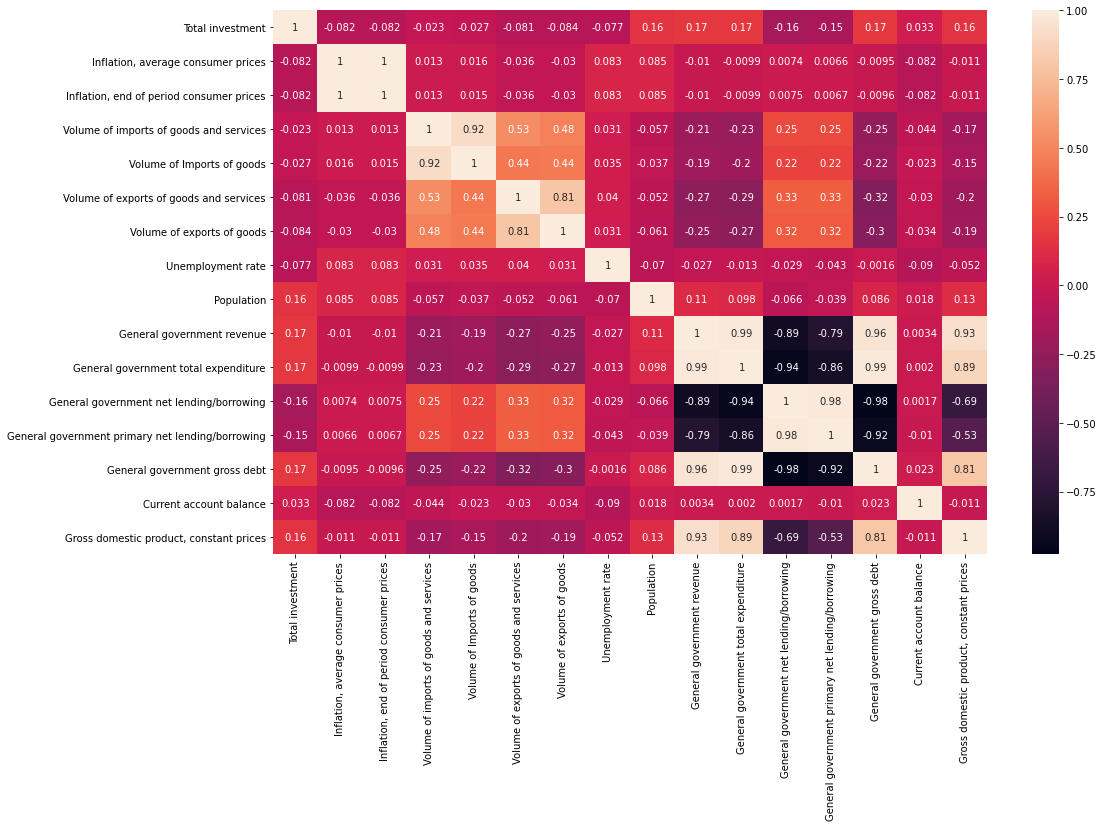

In [553]:
plt.figure(figsize=(16,10))
sns.heatmap(df_2019.corr(),annot=True);

In [555]:
from sklearn import preprocessing, svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import  mean_squared_error


In [556]:
kf = KFold(n_splits=10)

In [557]:
X = df_2019.drop(['Gross domestic product, constant prices'], 1)
y = df_2019['Gross domestic product, constant prices']

In [558]:
X = preprocessing.scale(X)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [559]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [560]:
X_train.shape

(136, 15)

In [561]:
y_train.shape

(136,)

In [562]:
X_test.shape

(59, 15)

In [563]:
y_test.shape

(59,)

In [564]:
LR_model = LinearRegression()


In [565]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [566]:
X_train[1]

array([ 1.73941837e-15, -7.25496939e-02, -7.25642140e-02,  6.26658307e-17,
        6.97404959e-17,  2.19717051e+00, -7.13625602e-17,  3.41616129e-16,
       -2.71451654e-01, -1.53287919e-01, -1.44937815e-01,  1.07724569e-01,
        9.31980038e-02, -1.40058321e-01, -4.42301719e-02])

In [567]:
LR_model.predict([X_train[4]])

array([574.69443237])

In [568]:
train_preds = LR_model.predict(X_train)

In [569]:
print(format(mean_squared_error(y_train, train_preds), 'f'))

99696931.129173


In [570]:
DT_model = DecisionTreeRegressor(max_depth=5)

In [571]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [572]:
train_preds = DT_model.predict(X_train)


In [573]:
print(format(mean_squared_error(y_train, train_preds), 'f'))

1786578.069317


In [574]:
list(DT_model.feature_importances_)

[0.002244761095772582,
 0.0,
 0.0,
 0.0006832318157353891,
 0.0,
 0.0,
 0.0018889256051941483,
 0.00015927655832245343,
 0.001413601946282497,
 0.7599942500883282,
 0.018323009790802244,
 0.0,
 0.20656609118302383,
 0.008726851916538856,
 0.0]

In [581]:
important_cols = ['Total investment',
        'General government revenue',
       'General government total expenditure',
       'General government primary net lending/borrowing',
       'General government gross debt',
        'Gross domestic product, constant prices']

In [582]:
df_2019_imp = df_2019[important_cols]

In [583]:
df_2019_imp.head().T

,0,1,2,3,4
Total investment,18.192,22.752,42.658,19.786,33.239
General government revenue,395.923,460.314,6586.500,6529.102,0.849
General government total expenditure,411.473,493.165,7725.477,6270.786,1.031
General government primary net lending/borrowing,-14.971,2.291,-1263.335,1961.720,-0.056
General government gross debt,90.092,1137.099,9349.221,35626.289,3.790
"Gross domestic product, constant prices",1319.902,839.449,7527.523,1553.430,3.619


In [584]:
X = df_2019_imp.drop(['Gross domestic product, constant prices'], 1)
y = df_2019_imp['Gross domestic product, constant prices']


In [585]:
X = preprocessing.scale(X)

In [586]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [587]:
X_train.shape

(136, 5)

In [588]:
y_train.shape

(136,)

In [589]:
X_test.shape

(59, 5)

In [590]:
y_test.shape

(59,)

In [591]:
DT_model = DecisionTreeRegressor(max_depth=5)

In [592]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [594]:
train_preds = DT_model.predict(X_train)

In [595]:
print(format(mean_squared_error(y_train, train_preds), 'f'))

29940277.609299


In [615]:
DT_model.predict([X_train[0]])

array([405.55921429])

In [612]:
type(X_train[0])

numpy.ndarray

In [613]:
X_train[0]

array([-1.0507074 , -0.15282326, -0.14448443,  0.09285705, -0.13941786])

In [599]:
y_train[0]

1319.902

In [600]:
import pickle

In [608]:
filename = 'model_decision_tree.pck'
pickle.dump(DT_model, open(filename, 'wb'))

In [609]:
loaded_model = pickle.load(open(filename, 'rb'))


In [610]:
loaded_model.predict([X_train[0]])

array([405.55921429])